In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import limit, symbols, oo

In [10]:
np.random.rand(10)

array([0.93315693, 0.16848492, 0.19812088, 0.40926282, 0.62375007,
       0.01789695, 0.03075739, 0.82141699, 0.84739865, 0.11750783])

In [8]:
test_y = np.random.dirichlet(np.ones(10), 5)
test_y.argmax(axis=1)
# for y in test_y:
#     print(y.argmax())

array([9, 5, 5, 1, 9], dtype=int64)

In [16]:
test_t = np.array([9, 4, 5, 1, 9])
test_t_onehot = np.zeros_like(test_y)
test_t_onehot[np.arange(test_y.shape[0]), test_t] = 1
test_t, test_t_onehot


(array([9, 4, 5, 1, 9]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]))

In [17]:
from common.functions import cross_entropy_error
cross_entropy_error(test_y, test_t), cross_entropy_error(test_y, test_t_onehot)

(1.2393509514760714, 1.2393509514760714)

In [21]:
from common.layers import SoftmaxWithLoss
sm = SoftmaxWithLoss()
sm_onehot = SoftmaxWithLoss()
sm.forward(test_y, test_t), sm_onehot.forward(test_y, test_t_onehot)

(2.057490867611401, 2.057490867611401)

In [22]:
sm.backward(1), sm_onehot.backward(1)

(array([[ 0.09326221,  0.09258983,  0.09604977,  0.08946214,  0.09811542,
          0.09345097,  0.09388978,  0.10368166,  0.08972747, -0.85022925],
        [ 0.09445989,  0.09798557,  0.09907441,  0.10882291, -0.90347155,
          0.11307172,  0.09309087,  0.10394691,  0.0990196 ,  0.09399967],
        [ 0.0905368 ,  0.09194772,  0.09688665,  0.10787168,  0.0982293 ,
         -0.87327416,  0.0906126 ,  0.09211044,  0.11023474,  0.09484423],
        [ 0.0914868 , -0.86813833,  0.09724557,  0.0998777 ,  0.098403  ,
          0.09697457,  0.09233539,  0.09465494,  0.10687719,  0.09028317],
        [ 0.09054774,  0.09917213,  0.09226081,  0.10759437,  0.0902854 ,
          0.09012387,  0.1009657 ,  0.09828243,  0.0897908 , -0.85902325]]),
 array([[ 0.09326221,  0.09258983,  0.09604977,  0.08946214,  0.09811542,
          0.09345097,  0.09388978,  0.10368166,  0.08972747, -0.85022925],
        [ 0.09445989,  0.09798557,  0.09907441,  0.10882291, -0.90347155,
          0.11307172,  0.09309

In [26]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [44]:
s = np.random.dirichlet((2, 10, 5), 1).transpose()
s.shape, s.sum(axis=0)

((3, 1), array([1.]))

Text(0.5, 1.0, 'Lengths of Strings')

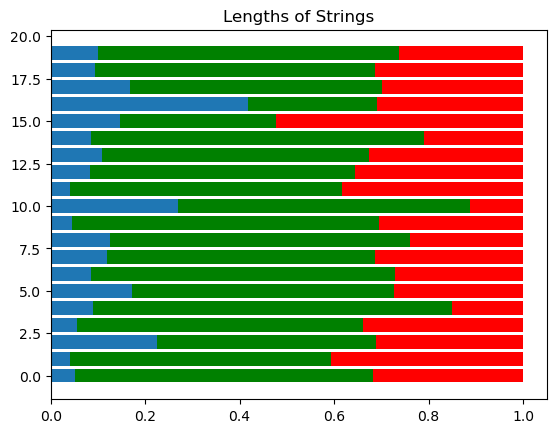

In [43]:
plt.barh(range(20), s[0])
plt.barh(range(20), s[1], left=s[0], color='g')
plt.barh(range(20), s[2], left=s[0]+s[1], color='r')
plt.title("Lengths of Strings")

In [38]:
s[0]

array([0.46199085, 0.48626529, 0.64596447, 0.43803853, 0.31352298,
       0.75782548, 0.5036427 , 0.47123885, 0.76247814, 0.52997538,
       0.4845766 , 0.33139491, 0.44247584, 0.64850183, 0.46192689,
       0.72223472, 0.84208926, 0.52119736, 0.42940951, 0.6917247 ])

In [17]:
y = symbols('y')
limit(y*(1-y), y, 0)

0

In [19]:
limit(y*(1-y), y, 1)

0

In [20]:
limit(y*(1-y), y, 1/2)

0.250000000000000

In [2]:
x1 = np.arange(6)
x1

array([0, 1, 2, 3, 4, 5])

In [3]:
np.power(x1, 3)

array([  0,   1,   8,  27,  64, 125], dtype=int32)

In [4]:
x2 = [1.0, 2.0, 3.0, 3.0, 2.0, 1.0]
np.power(x1, x2)

array([ 0.,  1.,  8., 27., 16.,  5.])

In [5]:
# The effect of broadcasting
x2 = np.array([[1, 2, 3, 3, 2, 1], [1, 2, 3, 3, 2, 1]])
x2

array([[1, 2, 3, 3, 2, 1],
       [1, 2, 3, 3, 2, 1]])

In [6]:
np.power(x1, x2)

array([[ 0,  1,  8, 27, 16,  5],
       [ 0,  1,  8, 27, 16,  5]])

In [9]:
x3 = np.array([-1.0, -4.0])
with np.errstate(invalid='ignore'):
    p = np.power(x3, 1.5)
p

array([nan, nan])

In [10]:
np.power(x3, 1.5, dtype=complex)

array([-1.83697020e-16-1.j, -1.46957616e-15-8.j])

In [12]:
(-1.0)**1.5

(-1.8369701987210297e-16-1j)

In [2]:
from common.gradient import *
from common.optimizer import *

In [18]:
def numerical_gradient(f, x):
    x = np.array(x)
    x = x.astype(float)
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = float(tmp_val) - h 
        fxh2 = f(x) # f(x-h)
        print(fxh1, fxh2, fxh1 - fxh2)
        grad[idx] = ((fxh1 - fxh2) / (2*h))#[idx]
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad
numerical_gradient(lambda x: np.sum(x**2), np.array([2.0, 3.0, 4.0]))


29.00040001 28.99960001 0.0007999999999981355
29.00060001 28.99940001 0.001200000000000756
29.00080001 28.99920001 0.0015999999999998238


array([4., 6., 8.])

In [19]:
numerical_gradient(lambda x: np.average(2*x**2), 2)

8.000800020000002 7.99920002 0.0016000000000016001


array(8.)

In [10]:
def function_2(x):
    return x[0]**2 + x[1]**2
numerical_gradient(function_2, np.array([3.0, 4.0]))

25.00060001 24.99940001 0.001200000000000756
25.00080001 24.99920001 0.0015999999999998238


array([6., 8.])

In [51]:
class Affine:
    def __init__(self, W, b) -> None:
        self.W = W   # (d, p)
        self.b = b   # (p, )
        self.X = None   # (n, d)
        self.dW = None
        self.dX = None
        self.db = None
    def forward(self, X):
        self.X = X   # (n, d) or (d, )
        out = np.dot(self.X, self.W) + self.b # (n, p) + (p, ) -> (n, p) broadcasting
        return out
    def backward(self, dout):
        self.dX = np.dot(dout,self.W.T)
        # ndim == 1인 경우 문제가 생긴다. 이를 해결하기 위한 조건문.
        if dout.ndim == 2: # 즉, batch로 입력되는 경우이다.
            self.dW = np.dot(self.X.T, dout)
            self.db = np.sum(dout, axis=0)  # forward시 브로드캐스팅으로 copy node 가 생략되었었다고 보고 adder를 적용
        elif dout.ndim == 1:
            self.dW = np.dot(self.X.reshape(self.X.size, 1), dout.reshape(1, dout.size))
            self.db = dout         
        else:
            print("Type or dimension is wrong.")
            raise TypeError
        return self.dX
W = np.random.randn(3, 2)
b = np.random.randn(2)
affine = Affine(W, b)
affine.W, affine.b

(array([[ 0.84964079, -0.12079466],
        [-0.27458147,  0.40673661],
        [ 1.03183847, -1.32362665]]),
 array([-1.27514703,  0.12722117]))

In [53]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        """ 해당 layer를 거쳐 내보내는 값을 결정한다. 여기서는
        Affine 계산값. backward 계산에 활용하기 위해 초기 shape을 
        클래스 변수로 기억시켜 둔다.        

        Args:
            x ((d,..,f) shaped ndarray): 반드시 2차 이상의 입력값 ndarray로서
                shape의 첫 인덱스는 data record를 지칭해야 한다. 즉, d 개의
                데이터(샘플)를 입력한다는 의미가 된다.

        Returns:
            (d,r) shaped ndarray: 계산 결과를 반환한다. 결과적인 shape은 클래스
                마다 다르다.
        """
        # 텐서 대응
        
        self.original_x_shape = x.shape
        # One shape dimension can be -1. In this case, 
        # the value is inferred from the length of the array 
        # and remaining dimensions. e.g. (2, 3, 4) -> (2, 12)
        x = x.reshape(x.shape[0], -1) # (1,f)->(1,f), (d,f)->(d,f), (d,m,f)->(d,m*f)...
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx

In [54]:
W = np.random.randn(3, 2)
b = np.random.randn(2)
affine = Affine(W, b)
affine.W, affine.b

(array([[-1.23089115, -0.39267319],
        [-0.69504687,  0.16143574],
        [ 0.24248903, -0.76754044]]),
 array([ 0.24947733, -0.51813901]))

In [62]:
x = np.array([1., 2., 3.0])
x

array([1., 2., 3.])

In [64]:
affine.forward(x.reshape(1, -1))

array([[-1.64404046, -2.89056203]])

In [69]:
affine.backward(np.array([[1, 2]]))

array([[-2.01623753, -0.37217538, -1.29259184]])

In [73]:
dout = np.array([[1., 2.]])
affine.backward(dout)
affine.db

array([1., 2.])

In [50]:
def forward(X):
        X = X.reshape(X.shape[0], -1)   # (d, f) or (f, )
        out = np.dot(X, W) + b # (d, f).(f, w) + (w, ) -> (n, p) broadcasting
        return out
x = np.array([[1, 2, 3]])
forward(x)

array([[7., 9.]])

In [47]:
X.reshape(12, -1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

In [43]:
X = np.array([[[1,2,3], [4, 5, 6]], [[7, 8, 9], [10,11,12]]])
print(X.shape)
X = X.reshape(X.shape[0], -1)
X

(2, 2, 3)


array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [150]:
f = lambda x, y: x**2 + y**2 + x*y + 3*x - 2*y
params = {'w': np.random.randn(5, 2), 'b': np.random.randn(5, 1)}
grad = lambda x, y: (2*x + y + 3, 2*y + x - 2)
params

{'w': array([[ 0.42416295,  0.3831017 ],
        [ 0.7047519 , -1.02008082],
        [-0.70389394, -1.42798903],
        [ 1.13612807, -0.16656184],
        [ 0.00402966, -0.50323545]]),
 'b': array([[ 0.29870793],
        [-0.12227447],
        [-0.47546514],
        [ 2.56351048],
        [ 0.74658351]])}

In [157]:
grads = {}
grads['w'], grads['b'] = grad(params['w'], params['b'])
grads['b'] = (grads['b'].sum(axis=1)/2).reshape(5, 1)
grads

{'w': array([[ 3.93714529,  3.85975306],
        [ 4.10924446,  0.85827976],
        [ 1.16734415, -0.19743028],
        [ 7.28178218,  4.82647223],
        [ 3.56033421,  2.60424093]]),
 'b': array([[-1.05894291],
        [-2.33737067],
        [-3.79713149],
        [ 3.21727934],
        [-0.80581581]])}

In [158]:
mom.update(params, grads)

In [159]:
params


{'w': array([[ 0.19499931,  0.15846662],
        [ 0.46719091, -1.06741346],
        [-0.76738826, -1.41162435],
        [ 0.70574524, -0.4532736 ],
        [-0.20337967, -0.65469953]]),
 'b': array([[ 0.35574957],
        [ 0.01141529],
        [-0.25376785],
        [ 2.36744728],
        [ 0.78984292]])}

In [103]:
from sympy import symbols, Matrix, lambdify
from sympy.vector import CoordSys3D, gradient
R = CoordSys3D('R')
s1 = R.x**2 +R.y**2 + R.x*R.y + 2*R.x + 3*R.y
g = gradient(s1)
params = {R.x: Matrix([[0.2, 0.3],[0.7,0.1]]), R.y: 0.0}
def gradient_values(params, g):
    g0 = g.subs(params.copy())
    print(g0)
    fx = lambdify([R.x, R.y], g.coeff(R.i), np)
    fy = lambdify([R.x, R.y], g.coeff(R.j), np) 
    return  {R.x: fx(g0.coeff(R.i), g0.coeff(R.j)), R.y: g0.coeff(R.j)}
gradient_values(params, g)

(2.0 + Matrix([
[0.4, 0.6],
[1.4, 0.2]]))*R.i + (3 + Matrix([
[0.2, 0.3],
[0.7, 0.1]]))*R.j


{R.x: 5 + 2*(2.0 + Matrix([
 [0.4, 0.6],
 [1.4, 0.2]])) + Matrix([
 [0.2, 0.3],
 [0.7, 0.1]]),
 R.y: 3 + Matrix([
 [0.2, 0.3],
 [0.7, 0.1]])}

In [96]:
lambdify([R.x, R.y],g.coeff(R.i))(1, 2)

6

In [9]:
f = np.array([1, 2, 4, 7, 11, 16], dtype=float)
np.gradient(f)

array([1. , 1.5, 2.5, 3.5, 4.5, 5. ])

In [12]:
np.gradient(f, 2)

array([0.5 , 0.75, 1.25, 1.75, 2.25, 2.5 ])

In [71]:
sgd.update(params, gradient_values(params, g))
params

{R.x: -0.312500000000000, R.y: -1.25000000000000}

In [5]:
ones = np.ones((2, 4))
ones

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [6]:
ones.sum(axis=0)

array([2., 2., 2., 2.])

In [7]:
ones.sum(axis=1)

array([4., 4.])

In [8]:
1 - ones

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
ones * ones

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [11]:
ones.ndim

2

In [12]:
from common.layers import Sigmoid
sigmoid = Sigmoid()
sigmoid.forward(ones)

array([[0.73105858, 0.73105858, 0.73105858, 0.73105858],
       [0.73105858, 0.73105858, 0.73105858, 0.73105858]])

In [13]:
sigmoid.out

array([[0.73105858, 0.73105858, 0.73105858, 0.73105858],
       [0.73105858, 0.73105858, 0.73105858, 0.73105858]])

In [17]:
dout = np.arange(0, 8).reshape(2, 4)
sigmoid.backward(dout)

array([[0.        , 0.19661193, 0.39322387, 0.5898358 ],
       [0.78644773, 0.98305967, 1.1796716 , 1.37628353]])

In [18]:
np.array(np.array([1,0, -3, -5,6,7]) > 0, dtype=np.int32)

array([1, 0, 0, 0, 1, 1])

In [20]:
s = np.random.dirichlet((10, 3), 20).transpose()
s

array([[0.52358115, 0.79216489, 0.61957747, 0.7362386 , 0.65302009,
        0.82111844, 0.71388413, 0.85279883, 0.83233847, 0.72436588,
        0.75488372, 0.74281702, 0.85105497, 0.87534427, 0.86945925,
        0.60861834, 0.46664472, 0.72795347, 0.73893307, 0.86077736],
       [0.47641885, 0.20783511, 0.38042253, 0.2637614 , 0.34697991,
        0.17888156, 0.28611587, 0.14720117, 0.16766153, 0.27563412,
        0.24511628, 0.25718298, 0.14894503, 0.12465573, 0.13054075,
        0.39138166, 0.53335528, 0.27204653, 0.26106693, 0.13922264]])